In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from k_e_ecto_network import KEEctoNetwork

In [78]:
def run_sim(tmax=1000, num_cb=20, num_rp=20, density_cb=.3, density_rp=.3, density_rp_cb=1, density_cb_rp=1, gc=100, s=.00277, xlim=None):
    """simulation function"""
    # cb edges
    edges_cb = []
    for i in range(num_cb):
        for j in range(i+1, num_cb):
            if np.random.rand() < density_cb and (i, j) not in edges_cb:
                edges_cb.append((i, j))

    # rp edges
    edges_rp = []
    for i in range(num_rp):
        for j in range(i+1, num_rp):
            if np.random.rand() < density_rp and (i, j) not in edges_rp:
                edges_rp.append((i, j))

    # cross edges
    edges_rp_cb = []
    for i in range(num_cb):
        for j in range(num_rp):
            if np.random.rand() < density_rp_cb:
                edges_rp_cb.append((i, j))
    edges_cb_rp = []
    for i in range(num_rp):
        for j in range(num_cb):
            if np.random.rand() < density_cb_rp:
                edges_cb_rp.append((i, j))
    
    # build and run network model
    ntwk = KEEctoNetwork(tmax=tmax,
                       num_cb=num_cb,
                       num_rp=num_rp,
                       pm_cb=range(num_cb),
                       edges_cb=edges_cb,
                       edges_rp=edges_rp,
                       gc=gc,
                       edges_rp_cb=edges_rp_cb,
                       edges_cb_rp=edges_cb_rp)
    
    for nrn in ntwk.cbnet.neurons:
        nrn.s = s
    
    ntwk.run()
    ntwk.cbnet.disp(xlim=xlim)
    ntwk.rpnet.disp(xlim=xlim)
    return ntwk

## hypostomal half

100%|█████████████████████████████████████████| 99999/99999 [00:38<00:00, 2568.90it/s]


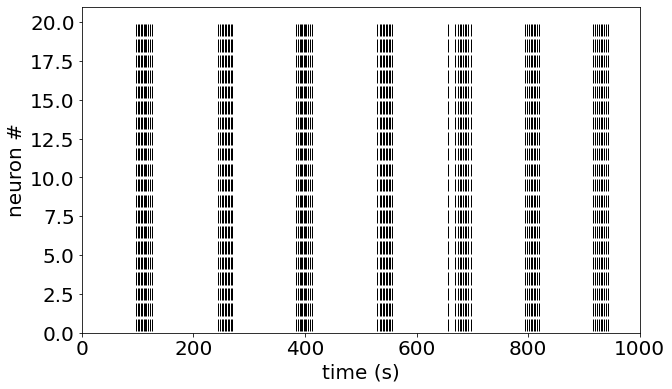

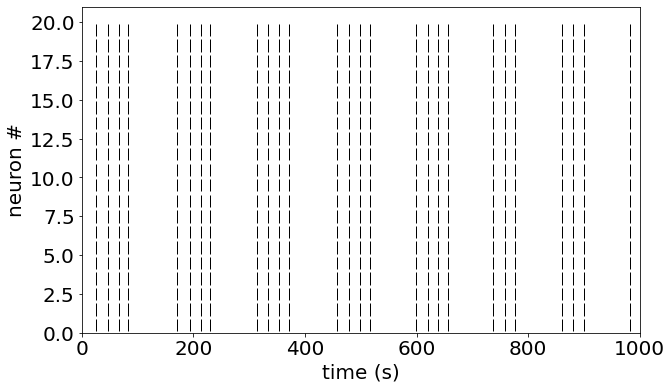

In [108]:
ntwk = run_sim(density_rp_cb=.1, density_cb_rp=.05)

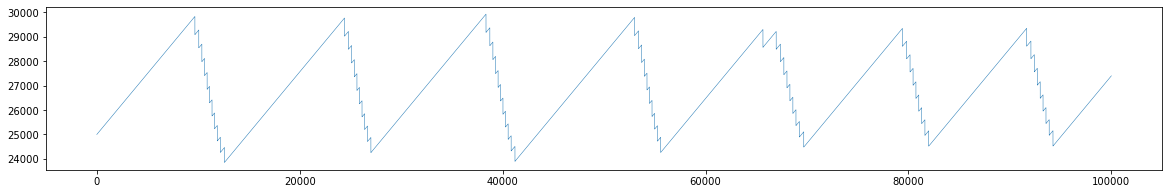

In [109]:
plt.figure(figsize=(20,3))
plt.plot(ntwk.cbnet.neurons[9].sigma_w_train, lw=.5)
plt.show()

## peduncle half

100%|███████████████████████████████████████| 199999/199999 [01:17<00:00, 2589.94it/s]


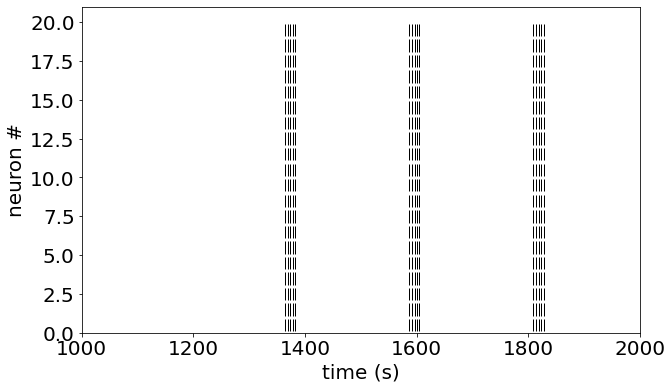

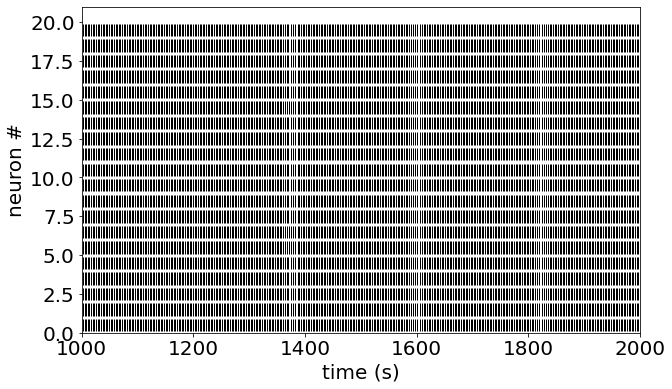

In [151]:
ntwk = run_sim(density_rp_cb=.12, density_cb_rp=.05, s=.0012, tmax=2000, xlim=(1000, 2000))

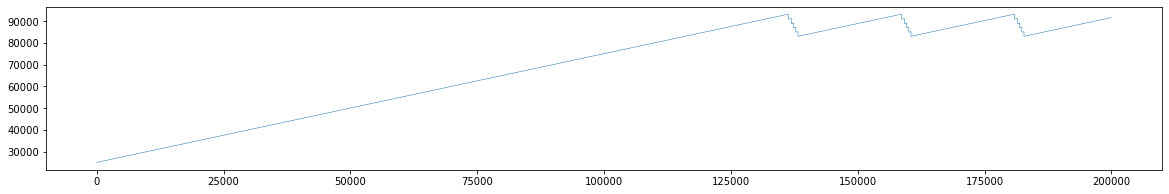

In [152]:
plt.figure(figsize=(20,3))
plt.plot(ntwk.cbnet.neurons[9].sigma_w_train, lw=.5)
plt.show()

In [153]:
ntwk.cbnet.neurons[0].get_k_e()

2289.562434849014

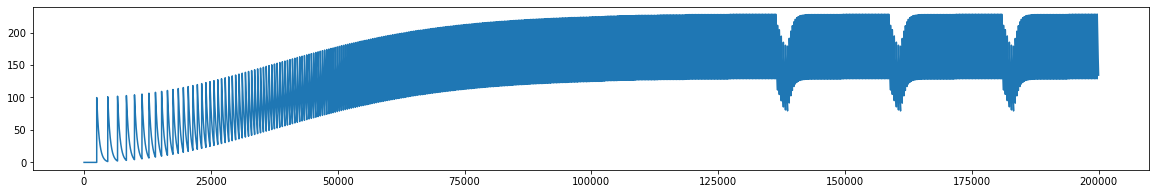

In [154]:
plt.figure(figsize=(20,3))
plt.plot(ntwk.i_inh_rp_cb_dic[(0, 10)])
plt.show()

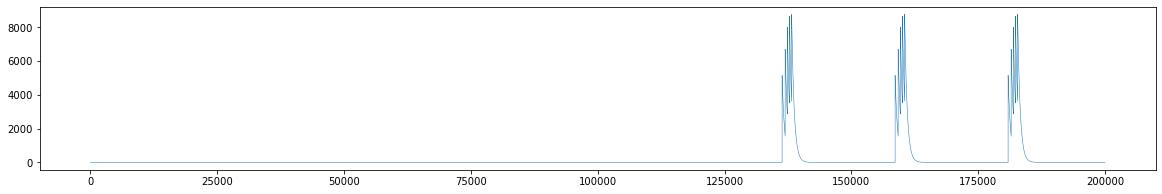

In [155]:
plt.figure(figsize=(20,3))
plt.plot(ntwk.cbnet.neurons[9].sigma_a_train, lw=.5)
plt.show()